In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys
sys.path.append("../derrom/")


import derrom

In [2]:
trajectories = derrom.utils.load_trajectories(filename='../../trajectories_n_kmax=200.npz')

n_trajectories = len(trajectories)
n_kmax = trajectories[0].shape[1]

print(n_trajectories, 'loaded with n_kmax =', n_kmax)

test_trajectory = derrom.utils.load_trajectories(filename='../../example_trajectory.npz')[0]
print('example trajectory loaded with shape: ', test_trajectory.shape)

1000 loaded with n_kmax = 200
example trajectory loaded with shape:  (400, 200)


In [4]:
import random

n_train_traj = [10,20,50,100,200,500,1000]
# n_train_traj = [10]

scores_list = []

for n in n_train_traj:
    
    print('training set size:', n)
    
    batches = n_trajectories//n
    
    print('number of batches:', batches)
    
    tmp_scores = []
    
    for b in range(batches):
        
#         train_traj = random.sample(trajectories,n)
        train_traj = trajectories[b*n:(b+1)*n]

        dim_reducer = derrom.dim_reducers.SVD()

    #     scaler = derrom.scalers.normalize_scaler(0.1)
        scaler = derrom.scalers.standardize_scaler(1.0)

    #     transformer = derrom.transformers.polynomial_features(order=2)
        transformer = derrom.transformers.ELM_features(ELM_nodes=400)

        optimizer = derrom.optimizers.ridge(alpha=10.**-3.0)

        model = derrom.derrom(train_traj, 'AR', DE_l=2, intercept=True, full_hist=False,
                              optimizer=optimizer,
                              scaler=scaler,
                              dim_reducer=dim_reducer,
                              NL_transformer=transformer)

        train_kwargs = {'rdim':15}

        scores = derrom.utils.get_KFold_CV_scores(model, train_traj, folds=10, seed=817, norms=['rms','max'], train_kwargs=train_kwargs)

        print('rms error: ', str(np.mean(scores[0])) + ' +- ' + str(np.std(scores[0])) )
        print('max error: ', str(np.mean(scores[1])) + ' +- ' + str(np.std(scores[1])) )
        
        tmp_scores.append(np.asarray(scores))

    tmp_scores = np.concatenate(tmp_scores,axis=1)
    print(tmp_scores.shape)
    
    scores_list.append(tmp_scores)

training set size: 10
number of batches: 100
rms error:  0.11681100942735707 +- 0.019098228050775296
max error:  0.41234762193661173 +- 0.055092332491086415
rms error:  0.14183250714751622 +- 0.049669915498556025
max error:  0.5831909817607365 +- 0.17197831250348478
rms error:  0.16303241423668505 +- 0.03858667933186602
max error:  0.498351114392989 +- 0.11362540238356328
rms error:  0.11885280620719538 +- 0.03512557808084237
max error:  0.5182145382291214 +- 0.202026790711254
rms error:  0.14574149758816862 +- 0.043758967931948695
max error:  0.5341198360479747 +- 0.18182415518535694
rms error:  0.13208541513897465 +- 0.03641624401492755
max error:  0.4569175636178332 +- 0.15287872626931912
rms error:  0.1808963466098485 +- 0.07132488049477538
max error:  0.9639780051625568 +- 0.69948411581682
rms error:  0.12694699594628459 +- 0.03830010235751068
max error:  0.47760596340582867 +- 0.14824587719121146
rms error:  0.14489287034863627 +- 0.03891319018783609
max error:  0.524681281182475

rms error:  0.11395607336655074 +- 0.04280885526290924
max error:  0.41919999953304493 +- 0.15568200447980424
rms error:  0.13690966402261645 +- 0.03494055723691651
max error:  0.5049180278091339 +- 0.13028299838256313
rms error:  0.1528147167506614 +- 0.07306439892194463
max error:  0.47750301057366923 +- 0.14018763418137534
rms error:  0.11351912206639836 +- 0.035928127392551835
max error:  0.4266557976780752 +- 0.10447945444935391
rms error:  0.14895916222815567 +- 0.04802010330569636
max error:  0.5340099132197598 +- 0.11779640812865542
rms error:  0.14326664721140608 +- 0.03346932906687031
max error:  0.5551917773051371 +- 0.1314121184709188
rms error:  0.12487302888848115 +- 0.042874182734188526
max error:  0.46023346232923135 +- 0.11298502437410231
rms error:  0.15718662929614874 +- 0.04996909279150283
max error:  0.6667368957699786 +- 0.32164666106187123
rms error:  0.12765821592135101 +- 0.04991525144274265
max error:  0.538221927217321 +- 0.19207671222783956
rms error:  0.115

rms error:  0.03398644751859412 +- 0.030608803774416424
max error:  0.13113487511772368 +- 0.09448756359680813
rms error:  0.03530153638301943 +- 0.02275890860058586
max error:  0.1432119186967611 +- 0.09127624857812067
rms error:  0.039229045733730074 +- 0.026756563617021424
max error:  0.1453965830614184 +- 0.0791164146469897
rms error:  0.028065560285697608 +- 0.015725602889588824
max error:  0.12741494087262487 +- 0.07111318595807822
rms error:  0.03165146745134682 +- 0.020789748053729098
max error:  0.12185844579863948 +- 0.06600051223671365
rms error:  0.029139513109665897 +- 0.019481007746480778
max error:  0.11723384968993557 +- 0.0693478430453453
rms error:  0.037758829921070144 +- 0.028570437344836924
max error:  0.1450400964193473 +- 0.09870314471724811
rms error:  0.03797417245681593 +- 0.03310274750427021
max error:  0.1502820123571717 +- 0.10161919178105544
rms error:  0.02579025296203094 +- 0.0158370930878641
max error:  0.10688004926328172 +- 0.055750571629893275
rms er

In [5]:
rms_mean = [np.mean(scrs[0]) for scrs in scores_list ]
rms_std  = [np.std(scrs[0]) for scrs in scores_list ]

max_mean = [np.mean(scrs[1]) for scrs in scores_list ]
max_std  = [np.std(scrs[1]) for scrs in scores_list ]

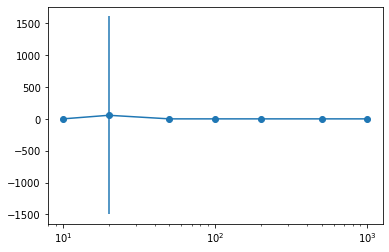

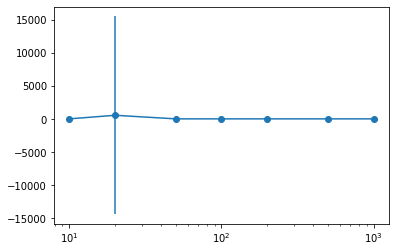

In [6]:
plt.errorbar(n_train_traj, rms_mean, yerr=rms_std, marker = 'o')
plt.xscale('log')
plt.show()

plt.errorbar(n_train_traj, max_mean, yerr=max_std, marker = 'o')
plt.xscale('log')
plt.show()

In [7]:
####################################################
####################################################
####################################################

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})

from matplotlib import gridspec
import matplotlib.ticker as ticker

fs = 9
fig = plt.figure(figsize=(3.40457,2.5))
plt.rcParams.update({'font.size': fs})
gs = gridspec.GridSpec(nrows=2, ncols=1, width_ratios=[1], height_ratios=[1,1])




####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[0,0])

plt.errorbar(n_train_traj, rms_mean, yerr=rms_std, marker = 'o')
plt.xscale('log')

plt.xlabel(r'training data set size')
plt.ylabel(r'rms error')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

# ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
# ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.002))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.01))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(a)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[1,0])

plt.errorbar(n_train_traj, max_mean, yerr=max_std, marker = 'o')
plt.xscale('log')

plt.xlabel(r'training data set size')
plt.ylabel(r'max error')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

# ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
# ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.01))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.04))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(b)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

####################################################
####################################################
####################################################



plt.tight_layout()

plt.subplots_adjust(left=0.11, bottom=0.14, right=0.97, top=0.97, wspace=0.08, hspace=0.45)


plt.savefig('/home/agluedge/Preprints/ELPH/figs/training_data_dependence.pdf')
plt.show()

Locator attempting to generate 68267 ticks ([-1650.3500000000001, ..., 1762.95]), which exceeds Locator.MAXTICKS (1000).


KeyboardInterrupt: 

Locator attempting to generate 68267 ticks ([-1650.3500000000001, ..., 1762.95]), which exceeds Locator.MAXTICKS (1000).


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7ff2b67e1790> (for post_execute):


KeyboardInterrupt: 

Locator attempting to generate 68267 ticks ([-1650.3500000000001, ..., 1762.95]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 164415 ticks ([-15899.800000000001, ..., 16983.0]), which exceeds Locator.MAXTICKS (1000).


Error in callback <function flush_figures at 0x7ff2b67e15e0> (for post_execute):


KeyboardInterrupt: 